In [1]:
import tensorflow as tf

In [2]:
const=tf.constant(34)
const

<tf.Tensor: shape=(), dtype=int32, numpy=34>

In [3]:
const=tf.constant(34,dtype=tf.float32)
const

<tf.Tensor: shape=(), dtype=float32, numpy=34.0>

In [4]:
tf.ones((9,5))

<tf.Tensor: shape=(9, 5), dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

In [5]:
tf.zeros((3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [6]:
const1=tf.constant([34,34,45])
const2=tf.constant([3,4,5])
tf.add(const1,const2)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([37, 38, 50])>

In [7]:
num=tf.random.normal((3,4
),stddev=1,mean=0
)

In [8]:
tf.reshape(num,[2,6])

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[ 0.04392148, -0.21735677, -0.84321004,  0.8814191 , -3.0940912 ,
        -0.8191537 ],
       [-1.4149593 , -0.7446251 ,  0.2557865 , -1.2697827 ,  2.6087892 ,
        -0.8329437 ]], dtype=float32)>

In [9]:
mat1=tf.constant([[3,4,5,6]])
mat2=tf.constant([[4,5,6,6]])

In [10]:
mat1.shape

TensorShape([1, 4])

In [11]:
tf.matmul(mat1,tf.transpose(mat2))

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[98]])>

In [12]:
tf.transpose(mat1)@mat2

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[12, 15, 18, 18],
       [16, 20, 24, 24],
       [20, 25, 30, 30],
       [24, 30, 36, 36]])>

In [13]:
ragged=tf.ragged.constant([[23],[34]])
ragged

<tf.RaggedTensor [[23], [34]]>

In [14]:
ragged.shape

TensorShape([2, None])

In [15]:
ragged[0]

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([23])>

In [16]:
mat1

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[3, 4, 5, 6]])>

In [17]:
tf.reduce_mean(mat1)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [18]:
tf.math.squared_difference(mat1,mat2)

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[1, 1, 1, 0]])>

In [19]:
var1=tf.Variable(tf.ones((5,5)))
var1

<tf.Variable 'Variable:0' shape=(5, 5) dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

In [20]:
ckpt=tf.train.Checkpoint(var=var1)
savepath=ckpt.save("./var.ckpt")

In [21]:
var1=var1.assign(tf.zeros((5,5)))

In [22]:
var1

<tf.Variable 'UnreadVariable' shape=(5, 5) dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [23]:
ckpt.restore(savepath)

In [24]:
var1

<tf.Variable 'UnreadVariable' shape=(5, 5) dtype=float32, numpy=
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)>

In [25]:
def fun(x,y):
    input_val=tf.multiply(x**3,6)+y**2
    return tf.reduce_mean(input_tensor=input_val)

In [26]:
func=tf.function(fun)

In [27]:
var1=tf.constant([3,4,5,5,6]*10000)
var2=tf.constant([3,4,7,8,9]*10000)

In [28]:
#var1

In [29]:
fun(var1,var2)# normal python function

<tf.Tensor: shape=(), dtype=int32, numpy=712>

In [30]:
func(var1,var2)#tensor function

<tf.Tensor: shape=(), dtype=int32, numpy=712>

In [31]:
def decorater_fn(input_fn):
    def decorater_in():
        print("++"*30)
        input_fn()
        print("++"*30)
    return decorater_in

In [32]:
def print_me():
    print("Nitin")
    

In [33]:
deco=decorater_fn(print_me)
deco()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Nitin
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [35]:
@ decorater_fn
def print_my():
    print("Hello")
    print("World")
    print("Hello")
    

In [36]:
print_my()

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Hello
World
Hello
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [37]:
x=tf.random.normal(shape=(2,2))
y=tf.random.normal(shape=(2,2))
y

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.2211008 , -0.04774101],
       [-0.9979138 , -0.5490927 ]], dtype=float32)>

In [38]:
with tf.GradientTape() as tape:
    tape.watch(x)
    f=tf.square(x)+tf.square(y)
    dy_dx=tape.gradient(f,x)
    print(dy_dx)

tf.Tensor(
[[ 2.4241896  1.029674 ]
 [-1.4288754  4.345122 ]], shape=(2, 2), dtype=float32)


In [39]:
with tf.GradientTape() as tape:
    tape.watch(y)
    f=tf.square(x)+tf.square(y)
    df_dy=tape.gradient(f,y)
    print(df_dy)

tf.Tensor(
[[-2.4422016  -0.09548201]
 [-1.9958276  -1.0981854 ]], shape=(2, 2), dtype=float32)


In [40]:
2*x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 2.4241896,  1.029674 ],
       [-1.4288754,  4.345122 ]], dtype=float32)>

In [41]:
with tf.GradientTape() as tape:
    tape.watch([y,x])
    f=tf.square(x)+tf.square(y)
    df_dy,df_dx=tape.gradient(f,[y,x])
    print(df_dy)
    print(df_dy)

tf.Tensor(
[[-2.4422016  -0.09548201]
 [-1.9958276  -1.0981854 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-2.4422016  -0.09548201]
 [-1.9958276  -1.0981854 ]], shape=(2, 2), dtype=float32)


In [42]:
with tf.GradientTape() as tape:
    tape.watch(y)
    tape.watch(x)
    f=tf.sqrt(tf.square(x)+tf.square(y))
    df_dy,df_dx=tape.gradient(f,[y,x])
    print(df_dy)
    print(df_dy)

tf.Tensor(
[[-0.7097191  -0.0923342 ]
 [-0.81310016 -0.24503487]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-0.7097191  -0.0923342 ]
 [-0.81310016 -0.24503487]], shape=(2, 2), dtype=float32)


In [43]:
True_w=3.0
True_b=2.0
x=tf.random.normal(shape=[1000])
noise=tf.random.normal(shape=[1000])
y=x*True_w+True_b
y_noise=y+noise

In [44]:
import matplotlib.pyplot as plt

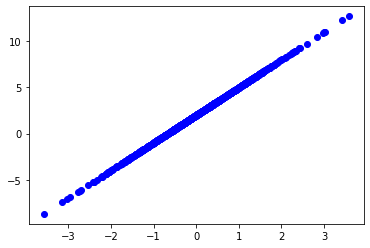

In [45]:
plt.scatter(x,y,c='b')
plt.show()

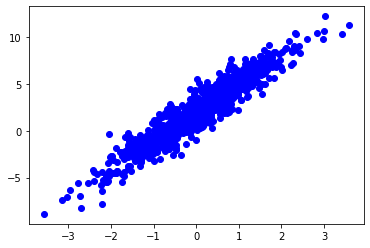

In [46]:
plt.scatter(x,y_noise,c='b')
plt.show()

In [47]:
class Mymodel(tf.Module):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        self.w=tf.Variable(4.0)
        self.b=tf.Variable(0.0)
    def __call__(self,x):
        return self.w*x+self.b


In [48]:
model=Mymodel()

In [49]:
model(9)

<tf.Tensor: shape=(), dtype=float32, numpy=36.0>

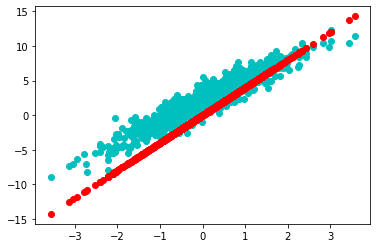

In [50]:
plt.scatter(x,y_noise,c='c')
plt.scatter(x,model(x),c='r')
plt.show()

In [51]:
def MSE_loss(actual,pred):
    error=actual-pred
    squared_error=tf.square(error)
    mse=tf.reduce_mean(error)
    return mse


In [52]:
def train(model,x,y,learning_rate):
    with tf.GradientTape() as tape:
        current_loss=MSE_loss(y,model(x))
        dw_dx,db_dx=tape.gradient(current_loss,[model.w,model.b])
        model.w.assign_sub(learning_rate*dw_dx)
        model.b.assign_sub(learning_rate*db_dx)
        

In [53]:
wb=[]
bs=[]
epochs=100
init_loss=MSE_loss(y,model(x))
print(f" initial loss {init_loss}")
w=model.w.numpy()
b=model.b.numpy()
print(f"initial weights {w} and biased {b}")


 initial loss 2.0004875659942627
initial weights 4.0 and biased 0.0


In [54]:
for epoch in range(epochs):
    train(model,x,y,0.01)
    loss=MSE_loss(y,model(x))
    # if loss >0.01 and loss < 0.12:
    #     break
    wb.append(model.w.numpy())
    bs.append(model.b.numpy())
    
    print(f"epoch  {epoch} loss = {loss} n weight{wb[-1]} biased {bs[-1]}" )


epoch  0 loss = 1.9904875755310059 n weight3.999995231628418 biased 0.01000000536441803
epoch  1 loss = 1.980487585067749 n weight3.999990463256836 biased 0.02000001072883606
epoch  2 loss = 1.9704875946044922 n weight3.999985694885254 biased 0.03000001609325409
epoch  3 loss = 1.9604876041412354 n weight3.999980926513672 biased 0.04000002145767212
epoch  4 loss = 1.9504872560501099 n weight3.99997615814209 biased 0.05000002682209015
epoch  5 loss = 1.9404875040054321 n weight3.999971389770508 biased 0.06000003218650818
epoch  6 loss = 1.9304875135421753 n weight3.999966621398926 biased 0.07000003755092621
epoch  7 loss = 1.9204875230789185 n weight3.9999618530273438 biased 0.08000004291534424
epoch  8 loss = 1.910487413406372 n weight3.9999570846557617 biased 0.09000004827976227
epoch  9 loss = 1.9004875421524048 n weight3.9999523162841797 biased 0.1000000536441803
epoch  10 loss = 1.8904873132705688 n weight3.9999475479125977 biased 0.11000005900859833
epoch  11 loss = 1.880487561225

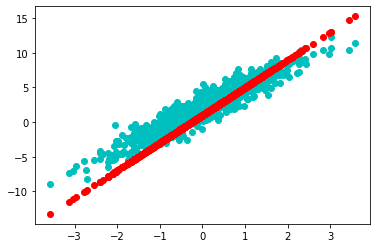

In [55]:
plt.scatter(x,y_noise,c='c')
plt.scatter(x,model(x),c='r')
plt.show()

In [56]:
model.b,model.w

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.9999994>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.9995232>)

In [57]:
model.b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.9999994>

In [58]:
True_b,True_w

(2.0, 3.0)

In [59]:
import tensorflow as tf

In [60]:
tf.constant(4.)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [61]:
tf.Variable(9.)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=9.0>

In [82]:
x=tf.random.normal(shape=[2000])
x

<tf.Tensor: shape=(2000,), dtype=float32, numpy=
array([-1.5561273 , -0.23408994, -0.9824501 , ...,  1.2632347 ,
       -0.04850296,  0.6286908 ], dtype=float32)>

In [83]:
noise=tf.random.normal(shape=[2000])
True_w=3
True_b=4

In [84]:
y=True_w*x+True_b

In [85]:
y

<tf.Tensor: shape=(2000,), dtype=float32, numpy=
array([-0.6683817,  3.2977302,  1.0526495, ...,  7.7897043,  3.8544912,
        5.886072 ], dtype=float32)>

In [86]:
y_noise=y+noise

In [87]:
import matplotlib.pyplot as plt

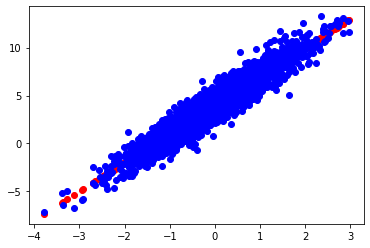

In [88]:
plt.scatter(x,y,c='r')
plt.scatter(x,y_noise,c='b')
plt.show()

In [101]:
class Mymodel(tf.Module):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        self.w=tf.Variable(4.)
        self.b=tf.Variable(3.)
    def __call__(self,x):
        return self.w*x+self.b

In [102]:
model=Mymodel()
model(9)

<tf.Tensor: shape=(), dtype=float32, numpy=39.0>

In [103]:
def MSE_loss(actual,predict):
    error=tf.subtract(actual,predict)
    squared_error=tf.square(error)
    return tf.reduce_mean(squared_error)

In [104]:
MSE_loss(y,model(x))

<tf.Tensor: shape=(), dtype=float32, numpy=1.9970872>

In [105]:
def train(model,x,y,learning_rate):
    with tf.GradientTape() as tape:
        current_loss=MSE_loss(y,model(x))
        dc_dw,dc_db=tape.gradient(current_loss,[model.w,model.b])
        model.w.assign_sub(learning_rate*dc_dw)
        model.b.assign_sub(learning_rate*dc_db)

In [106]:
w=[]
b=[]
for i in range(100):
    train(model,x,y,0.1)
    print(f"loss {MSE_loss(y,model(x))}")

loss 1.279065728187561
loss 0.8191977739334106
loss 0.5246684551239014
loss 0.3360327184200287
loss 0.21521785855293274
loss 0.1378399282693863
loss 0.08828198909759521
loss 0.0565418116748333
loss 0.036213219165802
loss 0.02319342829287052
loss 0.014854656532406807
loss 0.009513942524790764
loss 0.006093404721468687
loss 0.003902633674442768
loss 0.002499524038285017
loss 0.0016008811071515083
loss 0.0010253159562125802
loss 0.0006566897500306368
loss 0.00042059129918925464
loss 0.000269378419034183
loss 0.00017252593534067273
loss 0.0001104999755625613
loss 7.077255577314645e-05
loss 4.532681487035006e-05
loss 2.9032182283117436e-05
loss 1.8594695575302467e-05
loss 1.1909054592251778e-05
loss 7.628146249771817e-06
loss 4.8856090870685875e-06
loss 3.129207470919937e-06
loss 2.004127736654482e-06
loss 1.28365388718521e-06
loss 8.221651910389483e-07
loss 5.265271170173946e-07
loss 3.372575747562223e-07
loss 2.1606557254472136e-07
loss 1.3838479162586736e-07
loss 8.862524936148475e-08
lo

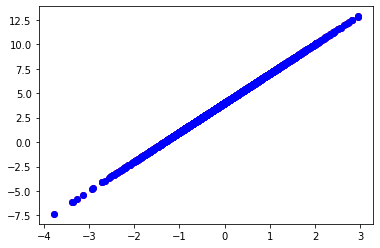

In [109]:
plt.scatter(x,y,c='r')
plt.scatter(x,model(x),c='b')
plt.show()

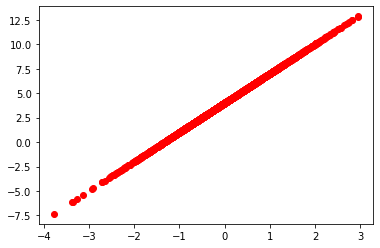

In [110]:
plt.scatter(x,y,c='r')
#plt.scatter(x,model(x),c='b')
plt.show()

In [112]:
print(True_b,True_w)
print(model.b,model.w)

4 3
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.9999995> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0000005>


In [1]:
import tensorflow as tf

In [4]:
x=tf.random.normal(shape=[1000])
noise=tf.random.normal(shape=[1000])

In [6]:
w=tf.constant(4.)
b=tf.constant(3.)
y=tf.multiply(w,x)+b
y_noise=tf.multiply(w,x)+b+noise

In [7]:
import matplotlib.pyplot as plt

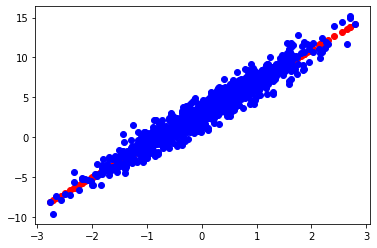

In [25]:
plt.scatter(x,y,c='r')
plt.scatter(x,y_noise,c='b')
plt.show()

In [9]:
class MyModel(tf.Module):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)
        self.w=tf.Variable(6.)
        self.b=tf.Variable(2.)
    def __call__(self,x):
        return tf.multiply(self.w,x)+self.b

In [10]:
model=MyModel()

In [11]:
model(8)

<tf.Tensor: shape=(), dtype=float32, numpy=50.0>

In [12]:
def MSe(actual,predict):
    error=tf.subtract(actual,predict)
    squared_error=tf.square(error)
    return tf.reduce_mean(squared_error)

In [14]:
MSe(y_noise,model(x))

<tf.Tensor: shape=(), dtype=float32, numpy=5.6831174>

In [19]:
def train(model,x,y,learning_rate):
    with tf.GradientTape() as tape:
        current_error=MSe(y,model(x))
        dc_dw,dc_db=tape.gradient(current_error,[model.w,model.b])
        model.w.assign_sub(learning_rate*dc_dw)
        model.b.assign_sub(learning_rate*dc_db)



In [20]:
for i in range(1000):
    train(model,x,y,0.1)
    

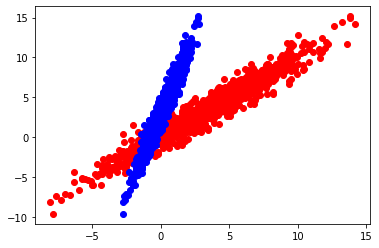

In [23]:
plt.scatter(model(x),y_noise,c='r')
plt.scatter(x,y_noise,c='b')
plt.show()

In [22]:
print(model.w,model.b)
w,b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=4.000001> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.9999995>


(<tf.Tensor: shape=(), dtype=float32, numpy=4.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)